In [1]:
library(readxl)
library(tidyverse)
library(tidymodels)

set.seed(1)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
#the second sheet presents the training data and the third sheet presents the testing data
knowledge_training <- read_excel(path = "Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls",sheet = 2)
knowledge_testing <- read_excel(path = "Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls",sheet = 3)

knowledge_training
knowledge_testing

New names:
• `` -> `...7`
• `` -> `...8`
New names:
• `` -> `...7`
• `` -> `...8`


STG,SCG,STR,LPR,PEG,UNS,...7,...8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
0.00,0.000,0.00,0.00,0.00,Very Low,NA,NA,"STG (The degree of study time for goal object materails),"
0.08,0.080,0.10,0.24,0.90,High,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.06,0.060,0.05,0.25,0.33,Low,NA,NA,STR (The degree of study time of user for related objects with goal object)
0.10,0.100,0.15,0.65,0.30,Middle,NA,NA,LPR (The exam performance of user for related objects with goal object)
0.08,0.080,0.08,0.98,0.24,Low,NA,NA,PEG (The exam performance of user for goal objects)
0.09,0.150,0.40,0.10,0.66,Middle,NA,NA,UNS (The knowledge level of user)
0.10,0.100,0.43,0.29,0.56,Middle,NA,NA,NA
0.15,0.020,0.34,0.40,0.01,Very Low,NA,NA,NA
0.20,0.140,0.35,0.72,0.25,Low,NA,NA,NA


STG,SCG,STR,LPR,PEG,UNS,...7,...8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
0.00,0.10,0.50,0.26,0.05,Very Low,NA,NA,"STG (The degree of study time for goal object materails),"
0.05,0.05,0.55,0.60,0.14,Low,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.08,0.18,0.63,0.60,0.85,High,NA,NA,STR (The degree of study time of user for related objects with goal object)
0.20,0.20,0.68,0.67,0.85,High,NA,NA,LPR (The exam performance of user for related objects with goal object)
0.22,0.22,0.90,0.30,0.90,High,NA,NA,PEG (The exam performance of user for goal objects)
0.14,0.14,0.70,0.50,0.30,Low,NA,NA,UNS (The knowledge level of user)
0.16,0.16,0.80,0.50,0.50,Middle,NA,NA,NA
0.12,0.12,0.75,0.68,0.15,Low,NA,NA,NA
0.20,0.20,0.88,0.77,0.80,High,NA,NA,NA


In [3]:
set.seed(1)

#first, we selected the variables
knowledge_training <- knowledge_training |>
            select(STG,SCG, PEG, UNS)

knowledge_testing <- knowledge_testing |>
            select(STG,SCG, PEG, UNS)

#then we renamed the columns names
knowledge_training <- knowledge_training |>
        rename(
            study_time = STG,
            repetition_number = SCG,
            exam_performance = PEG,
            knowledge_level = UNS)

knowledge_testing <- knowledge_testing|>
        rename(
            study_time = STG,
            repetition_number = SCG,
            exam_performance = PEG,
            knowledge_level = UNS)

#finally, since knowledge_level have a limited number of values, we changed it to a factor data type
knowledge_training <- knowledge_training |>
        mutate(knowledge_level = as_factor(knowledge_level))

knowledge_testing <- knowledge_testing|>
        mutate(knowledge_level = as_factor(knowledge_level))

In [4]:
head(knowledge_training)

study_time,repetition_number,exam_performance,knowledge_level
<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,Very Low
0.08,0.08,0.90,High
0.06,0.06,0.33,Low
0.10,0.10,0.30,Middle
0.08,0.08,0.24,Low
0.09,0.15,0.66,Middle


In [5]:
set.seed(1)

#what knowledge a median student would have?
median_activities <- knowledge_training |>
                        select (- knowledge_level) |>
                        summarize (mean_study_time = mean(study_time),
                                   mean_repet_time = mean(repetition_number),
                                   mean_perfomance = mean(exam_performance))

median_activities

mean_study_time,mean_repet_time,mean_perfomance
<dbl>,<dbl>,<dbl>
0.3711473,0.3556744,0.4585388


In [6]:
set.seed(1)

knowledge_recipe <- recipe(knowledge_level ~ ., data = knowledge_training) |>
                        step_scale(all_predictors()) |>
                        step_center(all_predictors())



knowledge_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [7]:
set.seed(1)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
       set_engine("kknn") |>
       set_mode("classification")



knowledge_fit <- workflow() |>
       add_recipe(knowledge_recipe) |>
       add_model(knn_spec) |>
       fit(data = knowledge_training)


knowledge_fit 

Warning message:
“tune samples were requested but there were 258 rows in the data. 253 will be used.”


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(tune(),     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.6589147
Best kernel: rectangular
Best k: 253

In [8]:
set.seed(1)

knowledge_vfold <- vfold_cv(knowledge_training, v = 5, strata = knowledge_level)

knowledge_vfold 

splits                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [9]:
set.seed(1)

kv <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

knn_results <- workflow() |>
       add_recipe(knowledge_recipe) |>
       add_model(knn_spec) |>
       tune_grid(resamples = knowledge_vfold, grid = kv) |>
       collect_metrics()


head(knn_results)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.7599548,5,0.03139094,Preprocessor1_Model01
1,roc_auc,hand_till,0.8433188,5,0.02689602,Preprocessor1_Model01
2,accuracy,multiclass,0.7599548,5,0.03139094,Preprocessor1_Model02
2,roc_auc,hand_till,0.8860627,5,0.02491624,Preprocessor1_Model02
3,accuracy,multiclass,0.7793363,5,0.01720275,Preprocessor1_Model03
3,roc_auc,hand_till,0.9148403,5,0.02130671,Preprocessor1_Model03


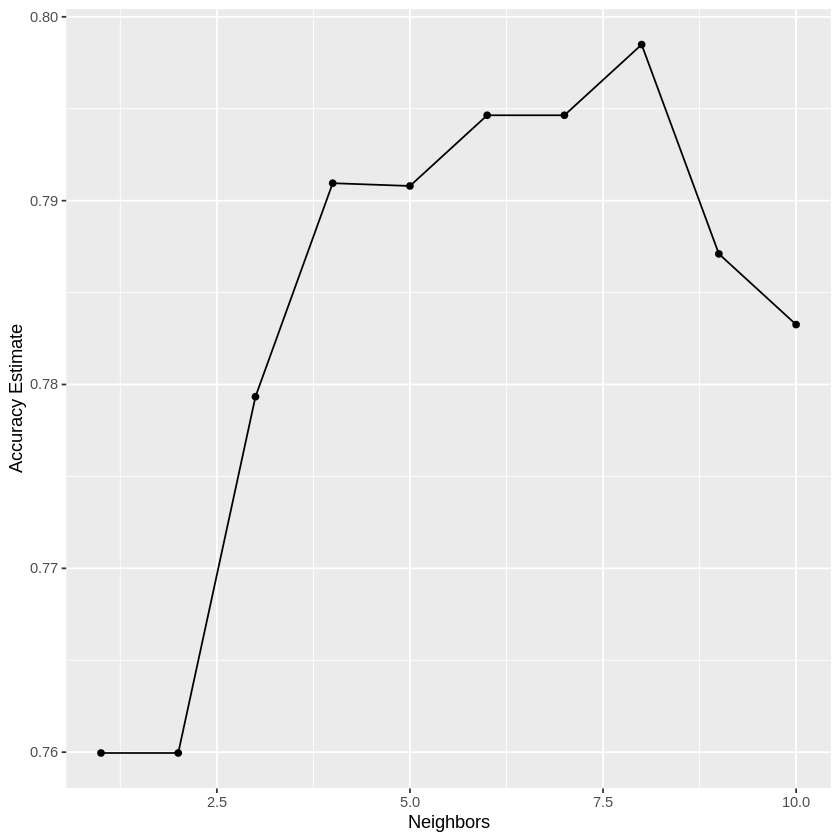

In [10]:
set.seed(1)

accuracies <- knn_results |> 
       filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") 
     #  scale_x_continuous(breaks = seq(0, 20, by = 1)) +  # adjusting the x-axis
     #  scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis



cross_val_plot


In [11]:
# with k = 8, we now build our model

set.seed(1) 

knn_spec_model <- nearest_neighbor(weight_func = "rectangular", neighbors = 8) |>
       set_engine("kknn") |>
       set_mode("classification")

knowledge_fit_model <- workflow() |>
       add_recipe(knowledge_recipe) |>
       add_model(knn_spec_model) |>
       fit(data = knowledge_training)


In [13]:
set.seed(1)

knowledge_predictions <- predict(knowledge_fit_model, knowledge_testing) |>
        bind_cols(knowledge_testing) |>
        mutate(.pred_class = fct_relevel(.pred_class, "Very Low", "Low", "Middle", "High")) |>
        mutate(knowledge_level = fct_relevel(knowledge_level, "Very Low", "Low", "Middle", "High"))
head(knowledge_predictions)


knowledge_metrics <- knowledge_predictions |>
         metrics(truth = knowledge_level, estimate = .pred_class)    

knowledge_metrics

knowledge_conf_mat <- knowledge_predictions |> 
       conf_mat(truth = knowledge_level, estimate = .pred_class)

knowledge_conf_mat

.pred_class,study_time,repetition_number,exam_performance,knowledge_level
<fct>,<dbl>,<dbl>,<dbl>,<fct>
Very Low,0.00,0.10,0.05,Very Low
Very Low,0.05,0.05,0.14,Low
High,0.08,0.18,0.85,High
High,0.20,0.20,0.85,High
High,0.22,0.22,0.90,High
Low,0.14,0.14,0.30,Low


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.7655172
kap,multiclass,0.6759989


          Truth
Prediction Very Low Low Middle High
  Very Low       10   1      0    0
  Low            16  41      9    0
  Middle          0   4     25    4
  High            0   0      0   35